## Práctica 2

Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset utilizado - World Happiness Report 2024

El dataset contiene datos del World Happiness Report 2024. Contiene las columnas:


1.   **Country name**: País del cuál provienen los datos.
2.   **year**: Año en que se tomó la información.
3. **Life Ladder**: Una medida subjetiva de satisfacción con su vida, donde valores más altos indican niveles de felicidad más altos.
4. **Log GDP per capita**: Logaritmo del Producto Interno Bruto per capita.
5. **Social support**: Métrica que indica el nivel percibido de apoyo social disponible a los individuos.
6. **Healthy life expectancy at birth**: Número de años que se espera que una persona viva asumiendo buena salud.
7. **Freedom to make life choices**: Libertad percibida de un individuo para hacer decisiones que impacten en su vida.
8. **Generosity**: Métrica indicando nivel de generosidad percibida de su país.
9. **Perceptions of corruption**: Nivel percibido de corrupción del gobierno del país.
10. **Positive affect**: Nivel de emociones positivas experimentadas por individuos.
11. **Negative affect**: Nivel de emociones negativas experimentadas por los individuos.

Haremos una exploración inicial del dataset:

In [2]:
df = pd.read_csv('World Happiness Report 2024.csv')
df.sample(3)

Country name  year  Life Ladder  Log GDP per capita  Social support  \
2123      Tunisia  2020     4.730811            9.214346        0.719013   
1915  South Korea  2013     5.958810           10.519244        0.796694   
492       Croatia  2009     5.433320           10.119982        0.860663   

      Healthy life expectancy at birth  Freedom to make life choices  \
2123                         66.949997                      0.667758   
1915                         71.559998                      0.641884   
492                          67.180000                      0.549258   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
2123   -0.206216                   0.877354         0.519345         0.438774  
1915   -0.055695                   0.831863         0.588525         0.188766  
492    -0.277662                   0.958131         0.557370         0.272170

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [4]:
df.shape

(2363, 11)

Podemos observar que algunas de nuestras columnas contienen valores nulos en sus datos. Por el número de datos, creo que podemos deshacernos de estos datos sin hacer gran impacto en el resto del dataset.

In [5]:
df = df.dropna()
df.shape

(2097, 11)

Generamos un *heatmap* para analizar la relación entre nuestros datos. Aprovechamos también para dejar las columnas de año y de país, que no serán utilizadas en este análisis.

<Axes: >

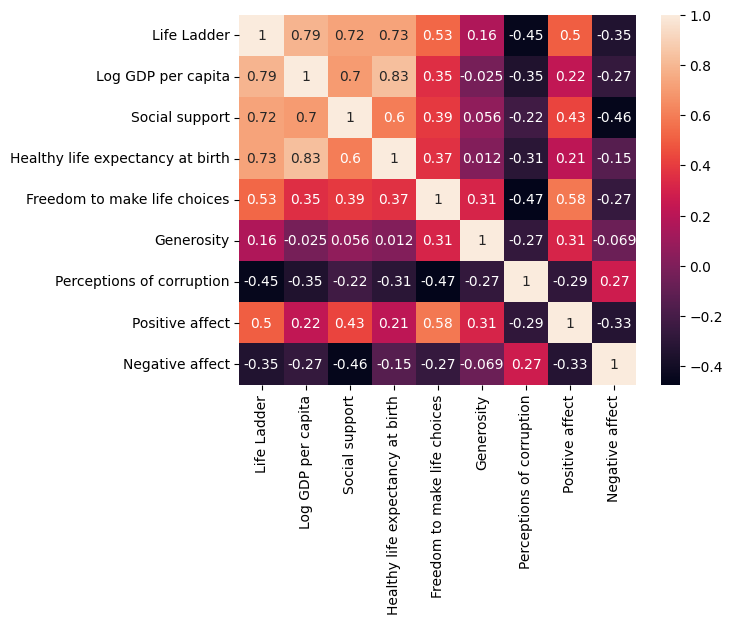

In [6]:
df=df.drop(columns=['Country name','year'])
sns.heatmap(df.corr(), annot=True)

Veremos los atributos de la columna **positive affect**.

In [7]:
df['Positive affect'].describe()

count    2097.000000
mean        0.653719
std         0.107398
min         0.178886
25%         0.571715
50%         0.664986
75%         0.740427
max         0.883586
Name: Positive affect, dtype: float64

Usaré en este caso la columna de **positive affect** para analizar los datos, ajustando a discreción intervalos generales que indican el nivel de emociones positivas en los individuos:

In [8]:
# Se define el intervalo de 0 a 0.5 como no muy positivo, de 0.5 a 0.7 como regular
# y de 0.7 en adelante como positivo.
bins = [0, 0.5, 0.7, 1]
labels = ['No Muy Positivo', 'Regular', 'Positivo']

# Reemplazamos los valores de nuestra columna por los nuevos valores
df['Positive affect'] = pd.cut(df['Positive affect'], bins=bins, labels=labels)
df.sample(3)

Life Ladder  Log GDP per capita  Social support  \
1869     6.082555           10.414831        0.917203   
541      7.970892           10.877718        0.953912   
1380     5.577784            9.288790        0.837321   

      Healthy life expectancy at birth  Freedom to make life choices  \
1869                         69.199997                      0.895522   
541                          68.959999                      0.969788   
1380                         63.299999                      0.557369   

      Generosity  Perceptions of corruption Positive affect  Negative affect  
1869    0.023633                   0.844791         Regular         0.295366  
541     0.266182                   0.247505        Positivo         0.163091  
1380   -0.052208                   0.969483         Regular         0.274551

Aquí hice un countplot para ver si con los intervalos seleccionados nuestra distribución es aceptable para el análisis.

<Axes: xlabel='Positive affect', ylabel='count'>

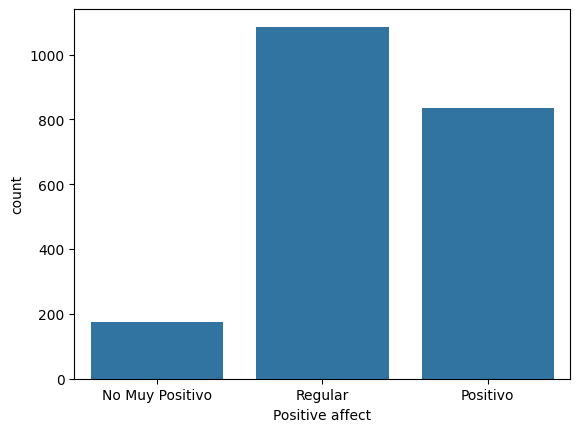

In [9]:
sns.countplot(data=df, x='Positive affect')

Satisfecho con esta distribución, genero un pairplot para ver si podemos identificar a simple vista las características de mayor impacto en las emociones positivas:

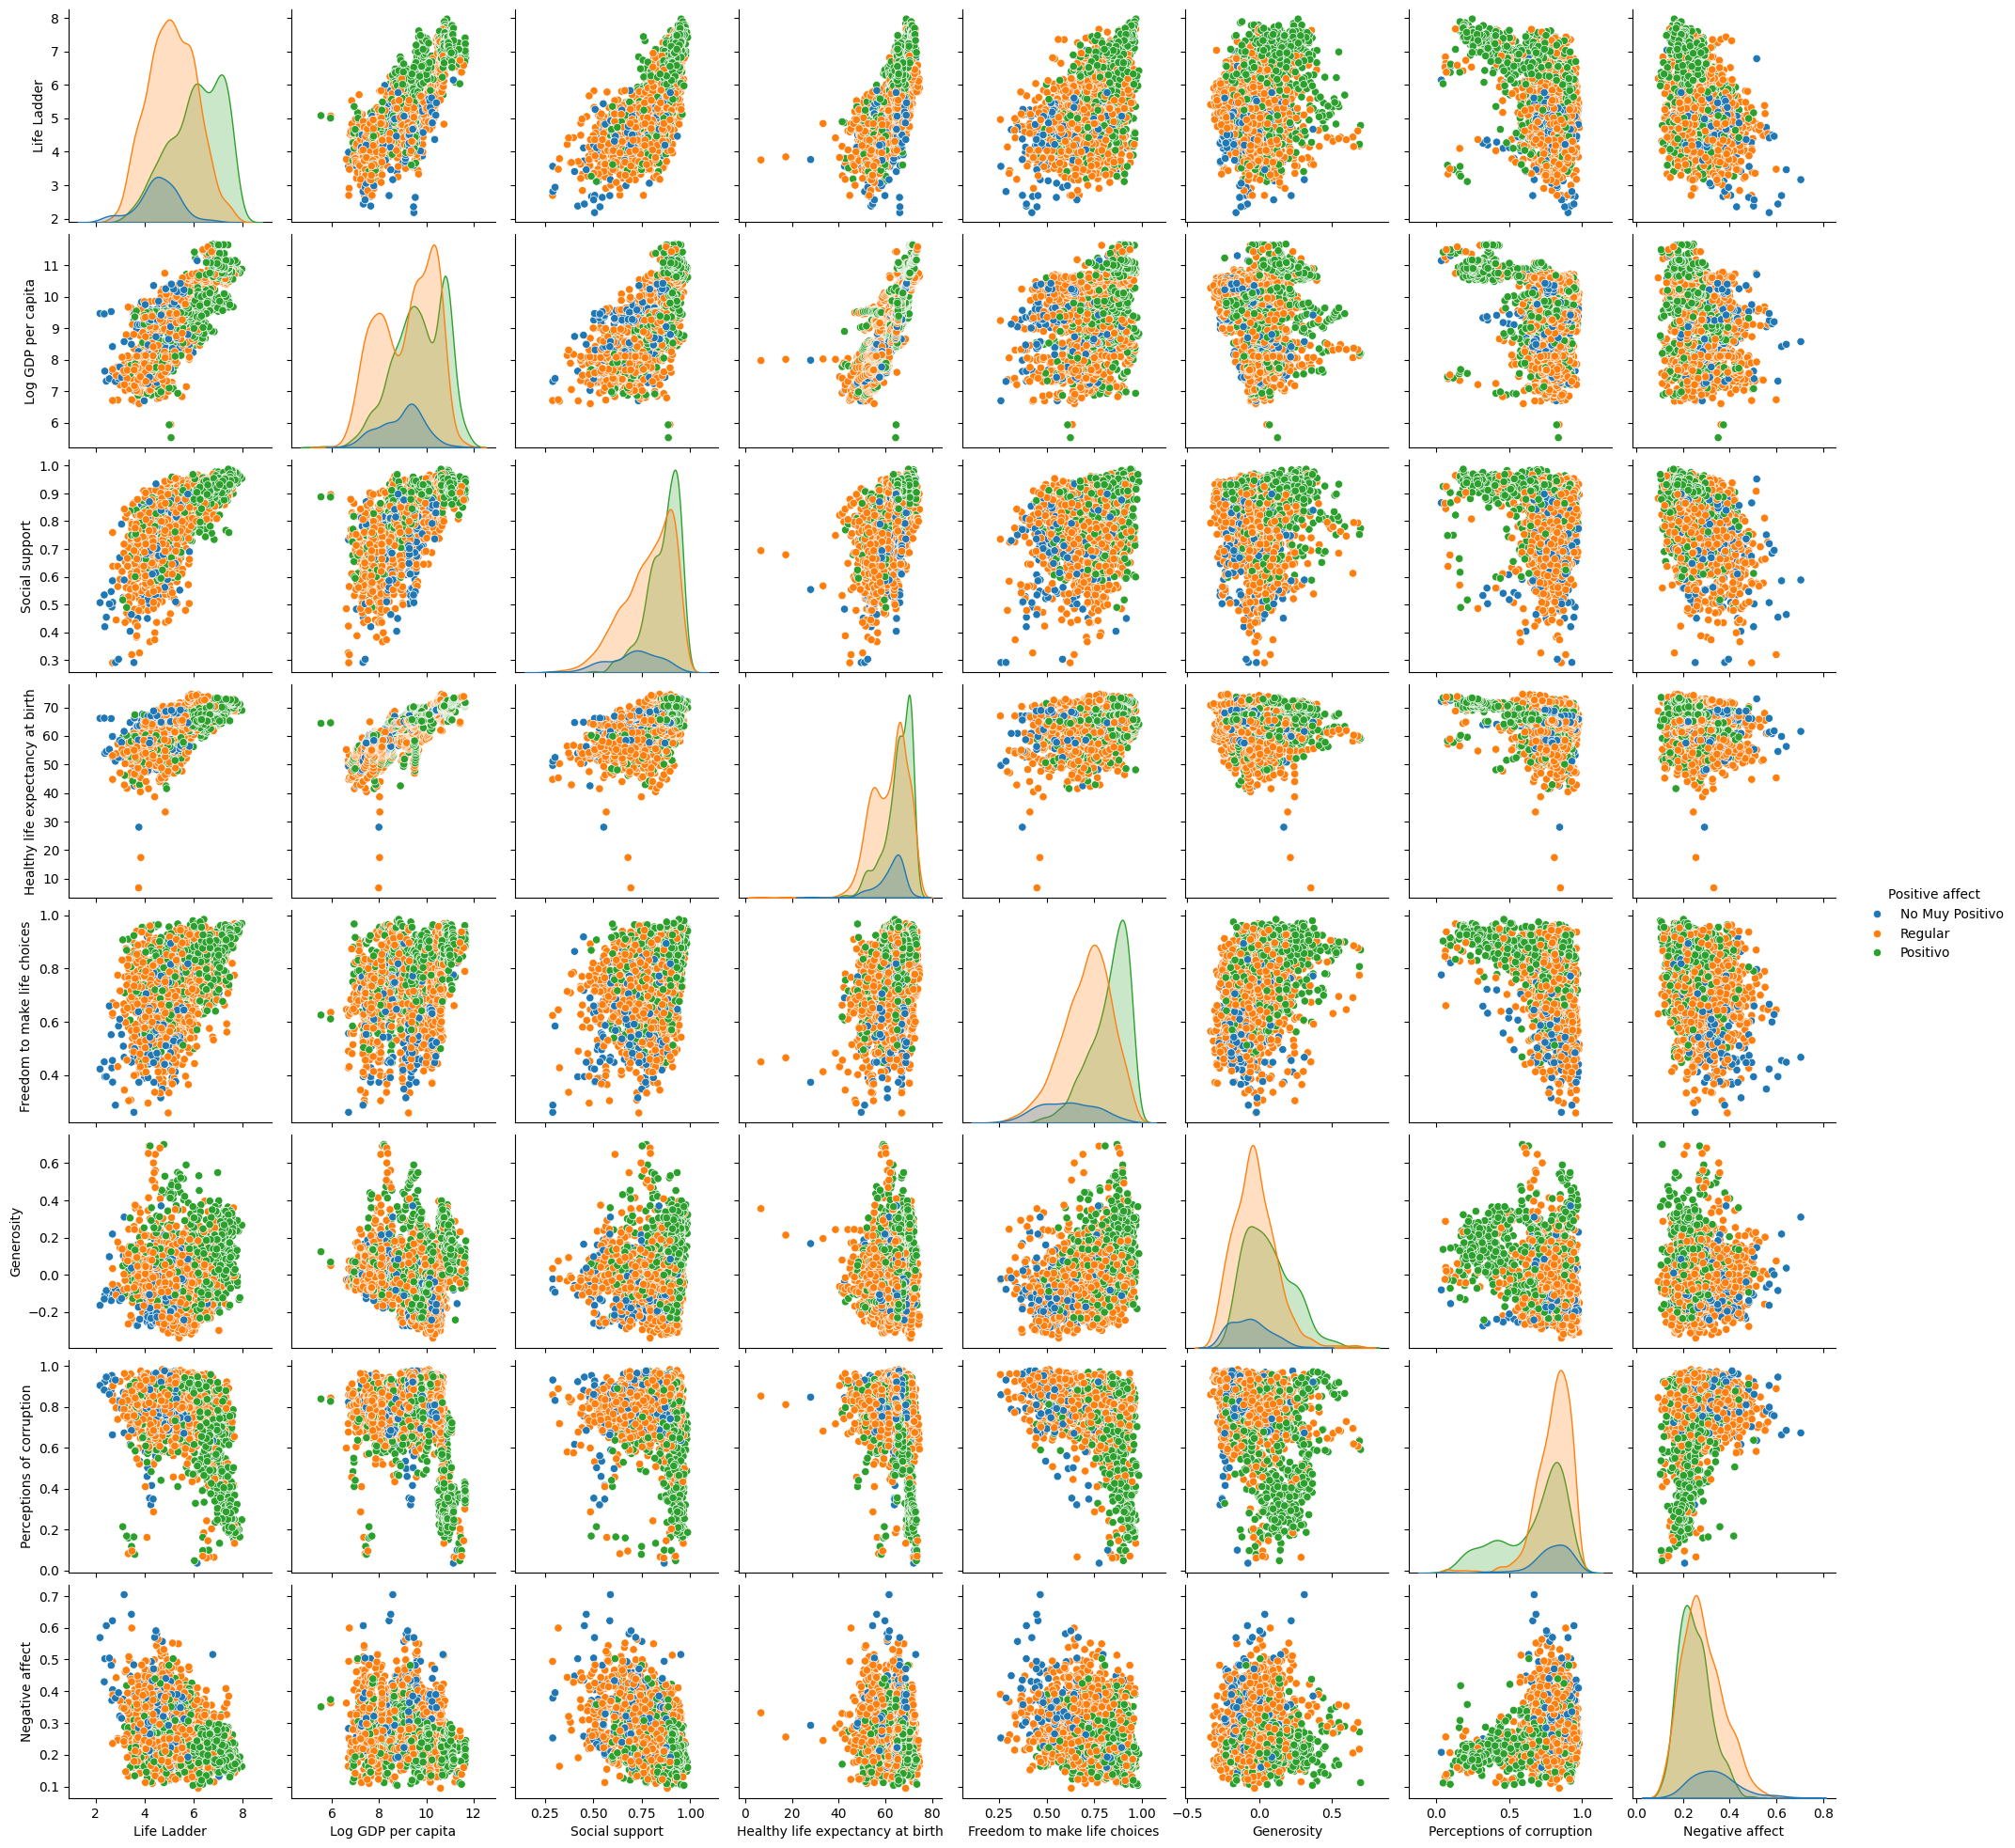

In [10]:
sns.pairplot(df, hue='Positive affect')

Aplicamos ahora la técnica de InfoGain para revisar esta relación, la cuál nos indica que lo que más impacto causa en emociones positivas es la libertad que siente el individuo de tomar sus propias decisiones, seguido de su nivel de satisfacción general con la vida y un poco después el PIB de su país de origen.

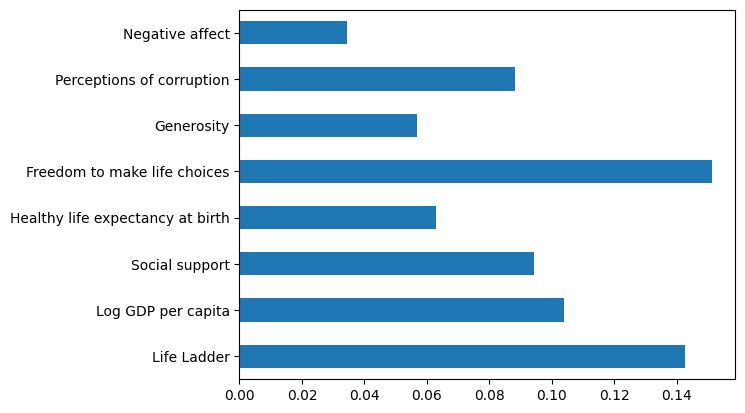

In [13]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns='Positive affect')
y = df['Positive affect']

X_new = mutual_info_classif(X, y)

feat_imp = pd.Series(X_new, X.columns)
feat_imp.plot(kind='barh')
plt.show()

Realizaremos ahora un análisis a las emociones negativas, de la misma manera:

In [14]:
df['Negative affect'].describe()

count    2097.000000
mean        0.274808
std         0.085464
min         0.094316
25%         0.211092
50%         0.263826
75%         0.326395
max         0.704590
Name: Negative affect, dtype: float64

Con estos datos seleccionamos los intervalos para nuestra columna:

In [15]:
# Definimos nuestros intervalos: de 0 a 0.25 como no muy negativo, de 0.25 a 0.4 regular,
# y de 0.4 en adelante negativo.
bins = [0, 0.25, 0.4, 1]
labels = ['No Muy Negativo', 'Regular', 'Negativo']

df['Negative affect'] = pd.cut(df['Negative affect'], bins=bins, labels=labels)
df.sample(3)

Life Ladder  Log GDP per capita  Social support  \
517      6.062051           10.556206        0.818671   
2334     5.243996            8.110991        0.761312   
1800     5.488737            8.140456        0.687614   

      Healthy life expectancy at birth  Freedom to make life choices  \
517                          72.000000                      0.811671   
2334                         51.380001                      0.769912   
1800                         59.400002                      0.758842   

      Generosity  Perceptions of corruption Positive affect Negative affect  
517     0.036033                   0.851206         Regular         Regular  
2334   -0.108183                   0.732268        Positivo         Regular  
1800   -0.024782                   0.795673        Positivo         Regular

Generamos el countplot, para revisar la distribución de nuestros nuevos datos;

<Axes: xlabel='Negative affect', ylabel='count'>

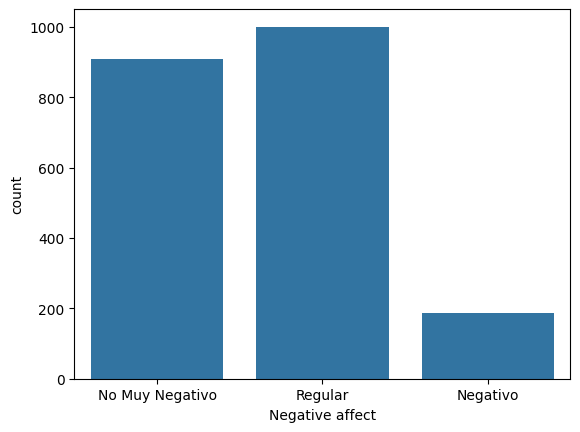

In [16]:
sns.countplot(data=df, x='Negative affect')

De igual manera realizamos un pairplot para visualizar la relación entre los datos y las emociones negativas:

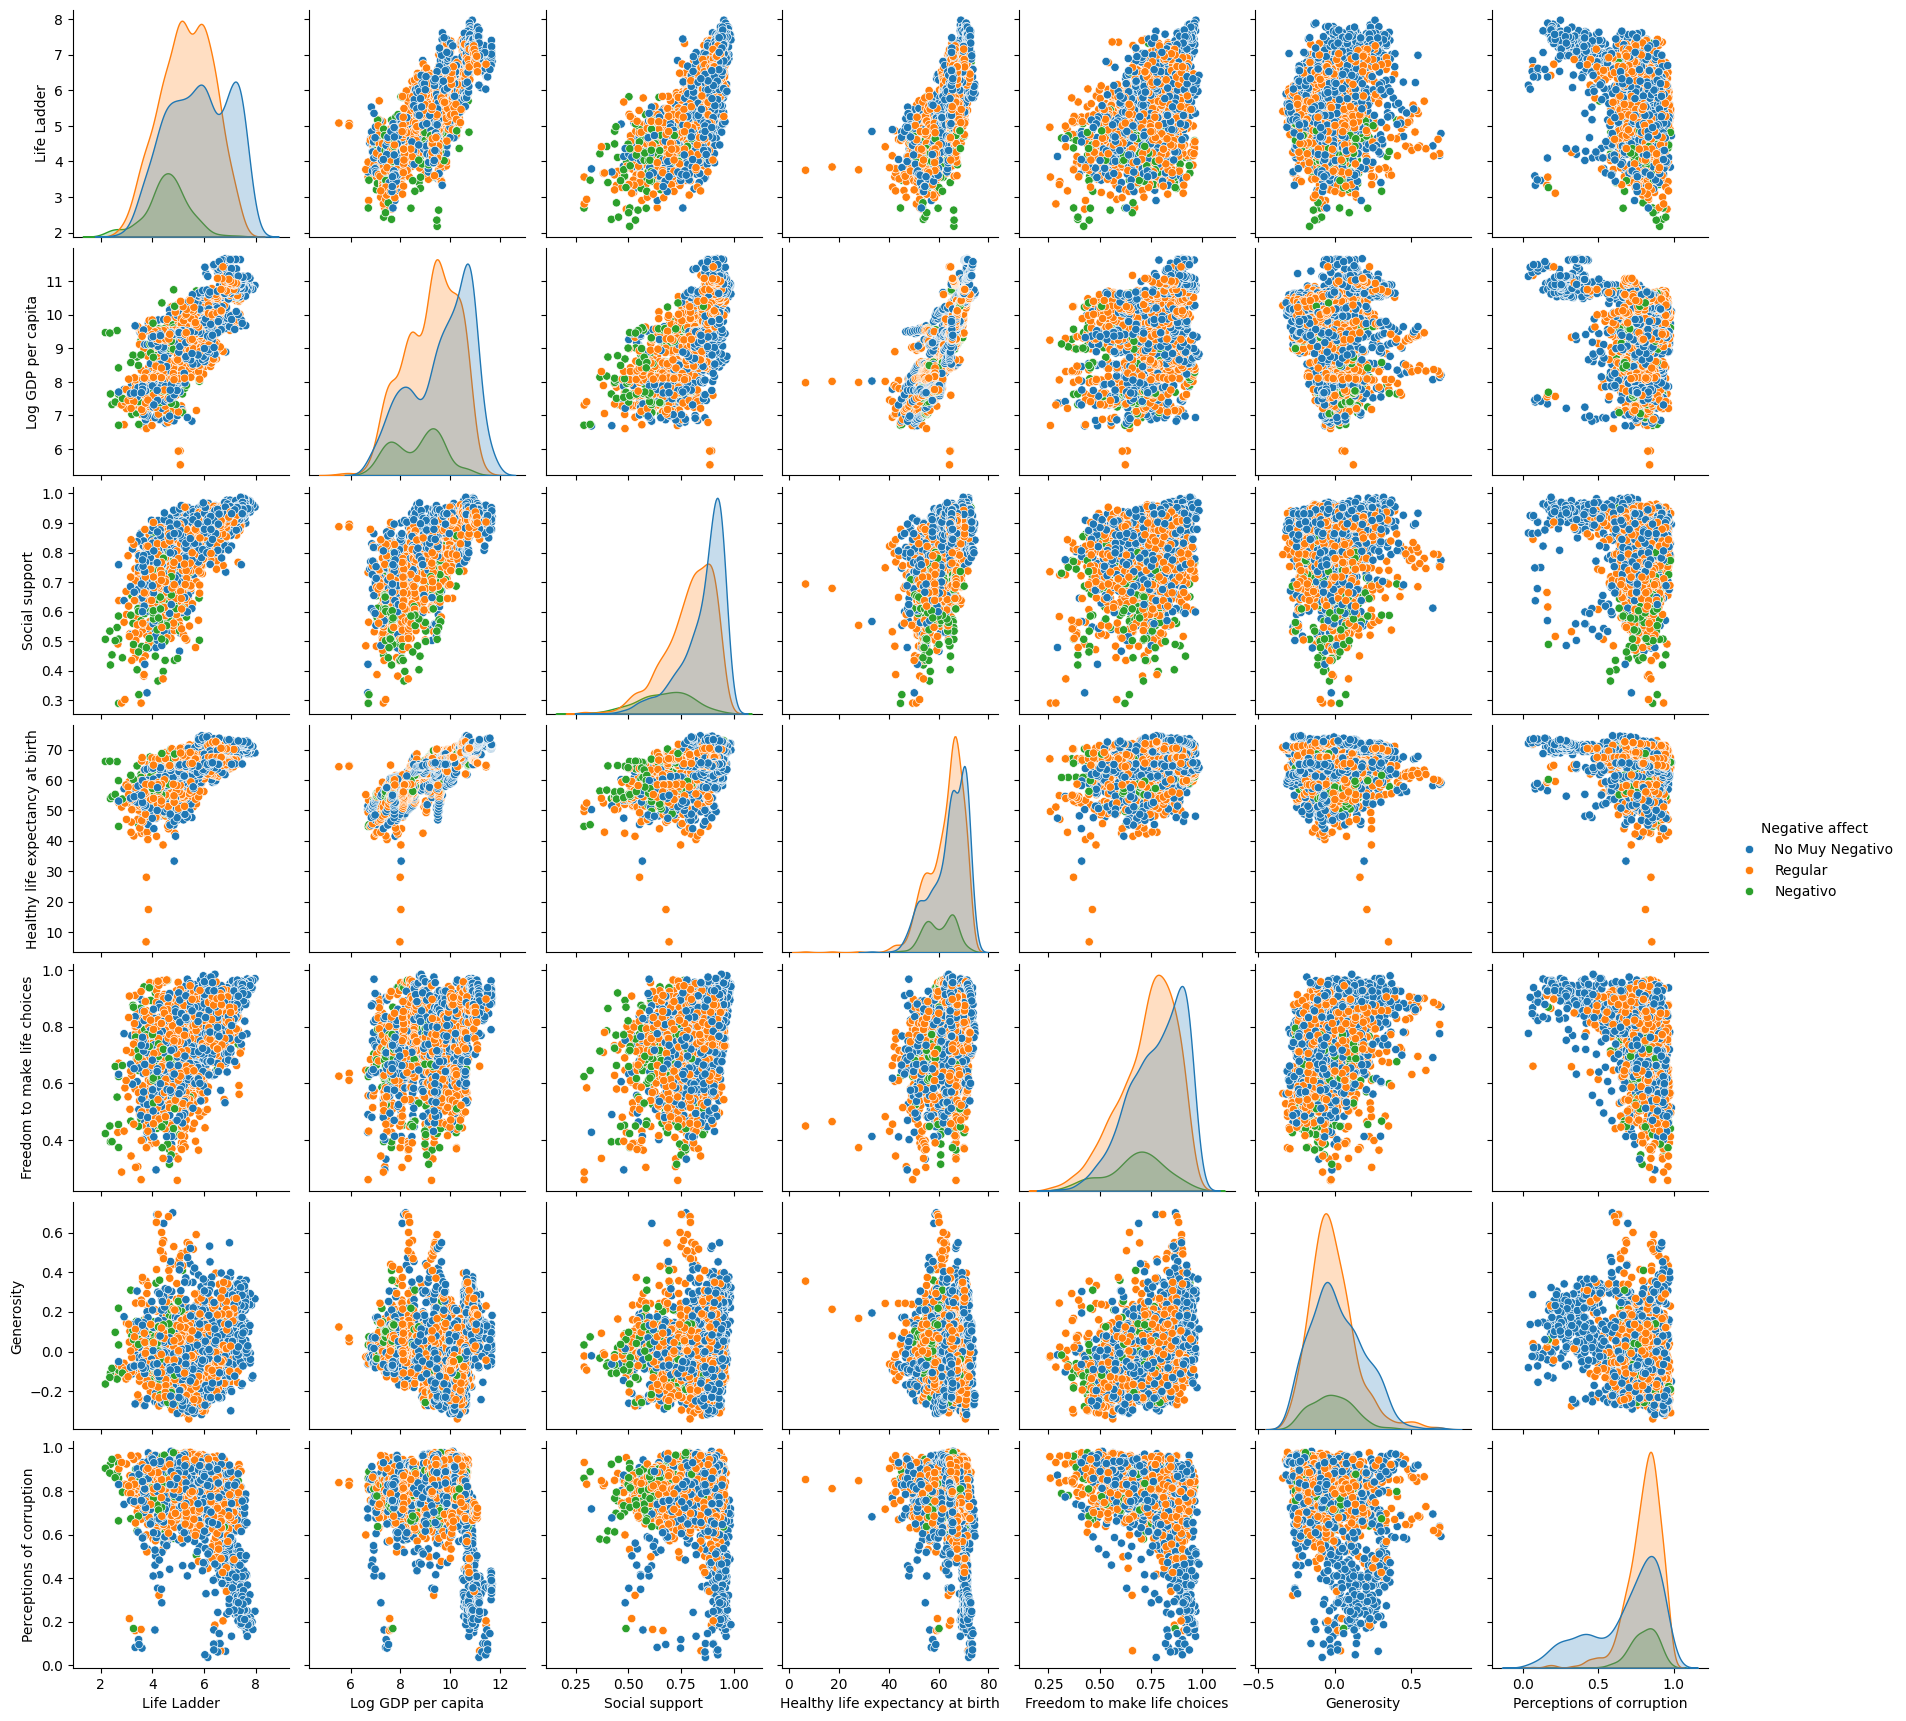

In [17]:
sns.pairplot(df, hue='Negative affect')

Y por último generamos utilizando InfoGain una gráfica que nos indica los valores con más impacto en las emociones negativas:

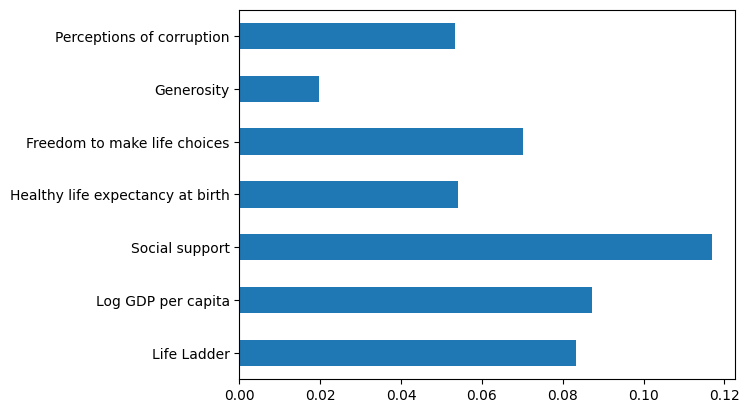

In [20]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['Negative affect','Positive affect'])
y = df['Negative affect']

### Applying feature selection method
X_new = mutual_info_classif(X, y)

# plot feature selection
feat_imp = pd.Series(X_new, X.columns)
feat_imp.plot(kind='barh')
plt.show()


Con estos datos podemos hacer algunas conclusiones generales:



*   Que influye en el sentir de emociones positivas principalmente la libertad que tiene un individuo para realizar sus propias decisiones
*   Por el *heatmap* se observa que hay una alta correlación entre percepción de niveles más bajos de libertad y percepción de corrupción en el gobierno
* Se observa que generosidad es un factor casi irrelevante en ambas emociones positivas y negativas.
* Para el sentir de emociones negativas parece ser muy importante el nivel percibido de apoyo social. Esto lo observamos tanto en el *heatmap* como al utilizar la técnica de InfoGain.

